<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99010b_Oscillations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

# Fowles Chapter 3 Oscillations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Simple Harmonic Oscillation

In [ ]:
class SimSHO:
  def __init__(self, m, k):
    self.m = m
    self.k = k

    self.x0 = 1.0
    self.v0 = 0.0

    self.tf = 10.0
    self.N = 101
    self.dt = self.tf/self.N

  def set_inits(self, x0, v0):
    self.x0 = x0
    self.v0 = v0

  def set_time_params(self, tf, N):
    self.tf = tf
    self.N = N

  def dSdt(self, t, S):
    x, v = S
    dvdt = -self.k/self.m * x
    return (v, dvdt)

  def run(self):
    S0 = (self.x0, self.v0)
    self.dt = self.tf/self.N
    teval = np.linspace(0, self.tf, self.N)
    return solve_ivp(self.dSdt, (0, self.tf), S0, t_eval = teval, max_step = self.dt)

In [ ]:
sim1 = SimSHO(10.0, 50.0)
sim1.set_inits(0.1, 0)
sim1.set_time_params(10, 1001)
sol1 = sim1.run()

sol1

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.990e+00  1.000e+01]
        y: [[ 1.000e-01  9.998e-02 ... -9.403e-02 -9.325e-02]
            [ 0.000e+00 -5.000e-03 ...  7.608e-02  8.076e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 6014
     njev: 0
      nlu: 0

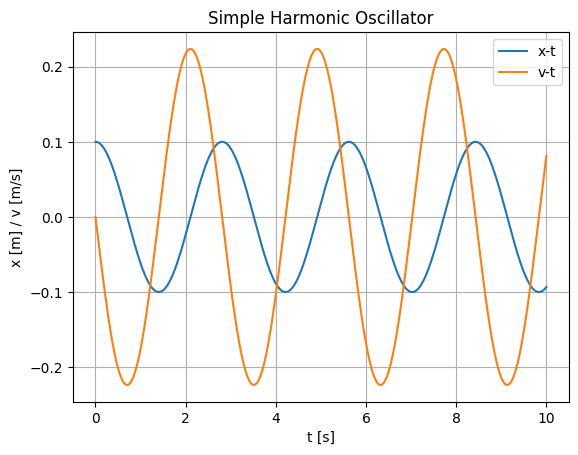

In [ ]:
plt.grid()
plt.title("Simple Harmonic Oscillator")
plt.plot(sol1.t, sol1.y[0], label="x-t")
plt.plot(sol1.t, sol1.y[1], label="v-t")
plt.xlabel("t [s]")
plt.ylabel("x [m] / v [m/s]")
plt.legend()

## Simple Pendulum

In [ ]:
class SimPen:
  def __init__(self, l, g):
    self.l = l
    self.g = g

    self.th0 = 1.0
    self.w0 = 0.0

    self.tf = 10.0
    self.N = 101
    self.dt = self.tf/self.N

  def set_inits(self, th0, w0):
    self.th0 = th0
    self.w0 = w0

  def set_time_params(self, tf, N):
    self.tf = tf
    self.N = N

  def dSdt(self, t, S):
    th, w = S
    dvdt = - self.g / self.l * np.sin(th)
    return (w, dvdt)

  def run(self):
    S0 = (self.th0, self.w0)
    self.dt = self.tf/self.N
    teval = np.linspace(0, self.tf, self.N)
    return solve_ivp(self.dSdt, (0, self.tf), S0, t_eval = teval, max_step = self.dt)

In [ ]:
sim2 = SimPen(1.0, 9.8)
sim3 = SimPen(1.0, 9.8)
sim2.set_inits(1/6 * np.pi, 0)
sim3.set_inits(2/3 * np.pi, 0)
sim2.set_time_params(10, 1001)
sim3.set_time_params(10, 1001)
sol2 = sim2.run()
sol3 = sim3.run()

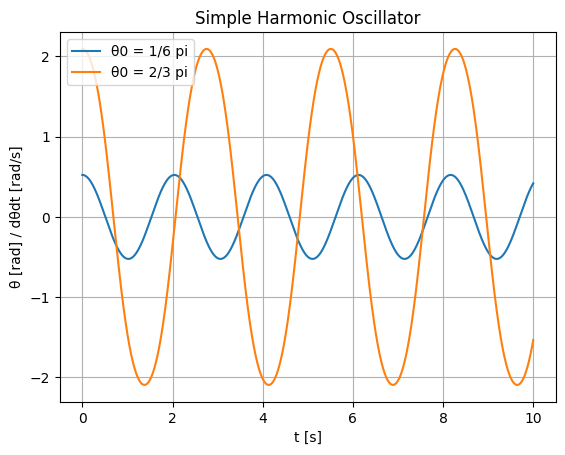

In [ ]:
plt.grid()
plt.title("Simple Harmonic Oscillator")
plt.plot(sol2.t, sol2.y[0], label="θ0 = 1/6 pi")
plt.plot(sol3.t, sol3.y[0], label="θ0 = 2/3 pi")
plt.xlabel("t [s]")
plt.ylabel("θ [rad] / dθdt [rad/s]")
plt.legend()

## Damped Harmonic Motion

In [ ]:
class SimDHO:
  def __init__(self, m, k, c):
    self.m = m
    self.k = k
    self.c = c

    self.x0 = 1.0
    self.v0 = 0.0

    self.tf = 10.0
    self.N = 100

  def set_inits(self, x0, v0):
    self.x0 = x0
    self.v0 = v0

  def set_time_params(self, tf, N):
    self.tf = tf
    self.N = N

  def dSdt(self, t, S):
    x, v = S
    dvdt = -self.c * v - self.k/self.m * x
    return (v, dvdt)

  def run(self):
    S0 = (self.x0, self.v0)
    dt = self.tf/self.N
    teval = np.linspace(0, self.tf, self.N + 1)
    return solve_ivp(self.dSdt, (0, self.tf), S0, t_eval = teval, max_step = dt)

In [ ]:
sim4 = SimDHO(10.0, 50.0, 1.0)
sim5 = SimDHO(10.0, 50.0, 5.0)
sim6 = SimDHO(10.0, 50.0, 20.0)

sim4.set_inits(0.1, 0)
sim5.set_inits(0.1, 0)
sim6.set_inits(0.1, 0)

sim4.set_time_params(10, 1001)
sim5.set_time_params(10, 1001)
sim6.set_time_params(10, 1001)

sol4 = sim4.run()
sol5 = sim5.run()
sol6 = sim6.run()

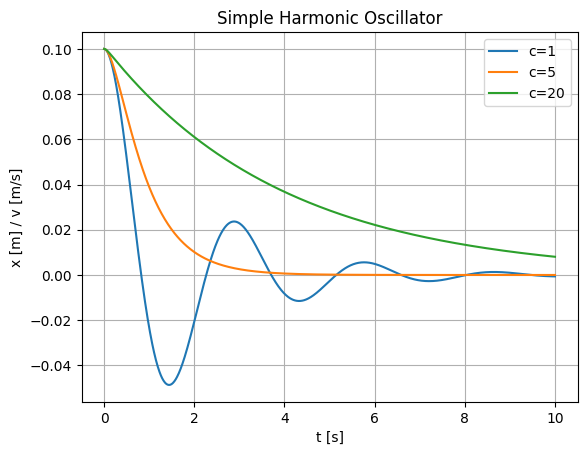

In [ ]:
plt.grid()
plt.title("Simple Harmonic Oscillator")
plt.plot(sol4.t, sol4.y[0], label="c=1")
plt.plot(sol5.t, sol5.y[0], label="c=5")
plt.plot(sol6.t, sol6.y[0], label="c=20")
plt.xlabel("t [s]")
plt.ylabel("x [m] / v [m/s]")
plt.legend()

## 3.5 Phase Space

Text(0, 0.5, 'v [m/s]')

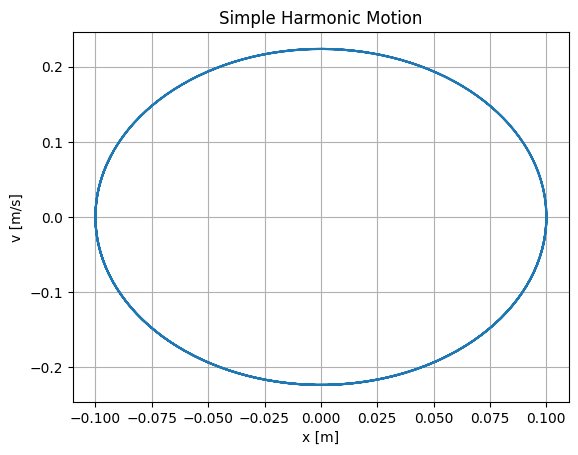

In [ ]:
plt.grid()
plt.title("Simple Harmonic Motion")
plt.plot(sol1.y[0], sol1.y[1])
plt.xlabel("x [m]")
plt.ylabel("v [m/s]")

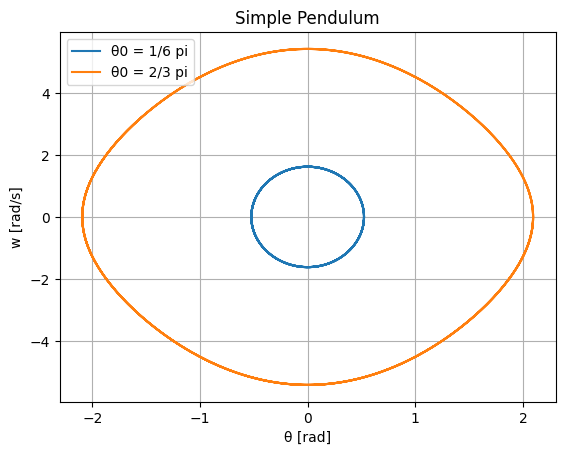

In [ ]:
plt.grid()
plt.title("Simple Pendulum")
plt.plot(sol2.y[0], sol2.y[1], label="θ0 = 1/6 pi")
plt.plot(sol3.y[0], sol3.y[1], label="θ0 = 2/3 pi")
plt.xlabel("θ [rad]")
plt.ylabel("w [rad/s]")
plt.legend()

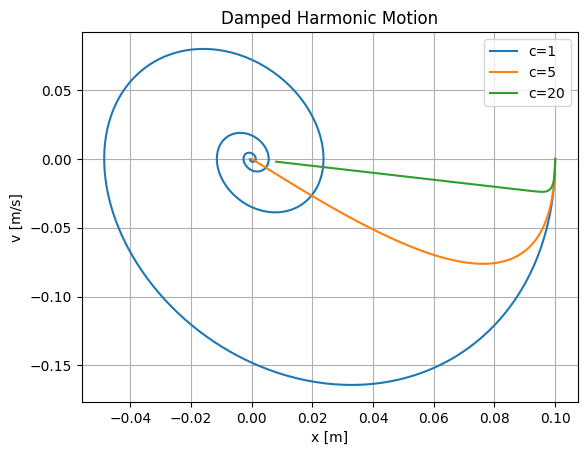

In [ ]:
plt.grid()
plt.title("Damped Harmonic Motion")
plt.plot(sol4.y[0], sol4.y[1], label="c=1")
plt.plot(sol5.y[0], sol5.y[1], label="c=5")
plt.plot(sol6.y[0], sol6.y[1], label="c=20")
plt.xlabel("x [m]")
plt.ylabel("v [m/s]")
plt.legend()

## 3.6 Forced Harmonic Motion: Resonance

In [ ]:
class SimFHM:
  def __init__(self, F0, omega, m, k, c):
    self.F0 = F0
    self.omega = omega
    self.m = m
    self.k = k
    self.c = c

    self.x0 = 0.0
    self.v0 = 0.0

    self.tf = 10.0
    self.N = 100

  def dSdt(self, t, S):
    x, v = S
    dvdt = -self.c/self.m * v\
      - self.k/self.m * x\
      + self.F0 * np.cos(self.omega * t)
    return (v, dvdt)

  def set_inits(self, x0, v0):
    self.x0 = x0
    self.v0 = v0

  def set_time_params(self, tf, N):
    self.tf = tf
    self.N = N

  def run(self):
    S0 = (self.x0, self.v0)
    dt = self.tf / self.N
    teval = np.linspace(0, self.tf, self.N + 1)
    return solve_ivp(self.dSdt, (0, self.tf), S0, t_eval=teval, max_step=dt)


In [ ]:
ks = range(41)
omegas = [o for o in ks]

fhms = [SimFHM(1, o, 1, 100, 5) for o in omegas]

for sim in fhms:
  sim.set_time_params(20, 1001)

sols = [sim.run() for sim in fhms]

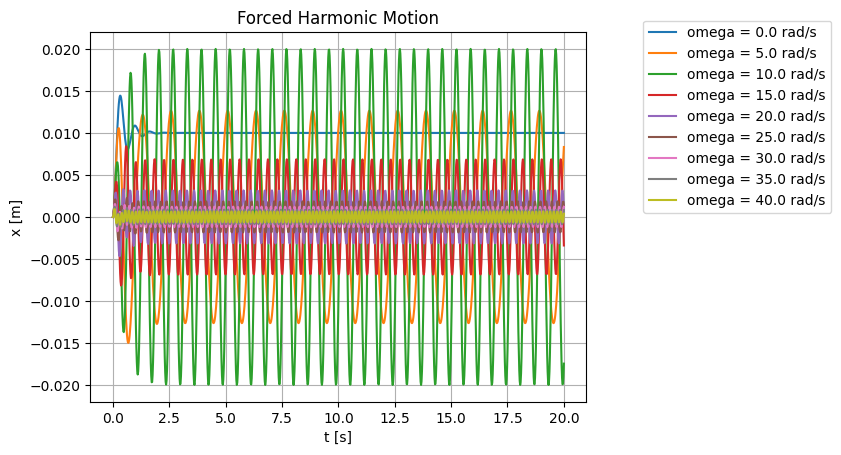

In [ ]:
plt.grid()
plt.title("Forced Harmonic Motion")
plt.xlabel("t [s]")
plt.ylabel("x [m]")

for k in ks[::5]:
  plt.plot(sols[k].t, sols[k].y[0], label = f"omega = {omegas[k]:.1f} rad/s")

ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
Amps = [sol.y[0][500:].max() for sol in sols]

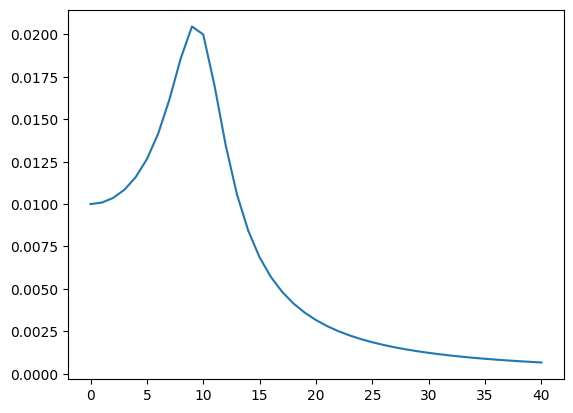

In [ ]:
plt.plot(omegas, Amps)

In [ ]:
def Amp(F0, m, oo, oo0, gamma):
  return (F0/m) / np.sqrt((oo**2- oo0**2)**2 + 4* gamma**2 * oo**2)

$$ A(\omega) = \frac{F_0/m}{\sqrt{\left( \omega_0^2-\omega^2 \right)^2 + 4 \gamma^2 \omega^2}}$$

In [ ]:
oos = np.linspace(0, 40, 100)
As = Amp(1, 1, oos, 10, 2.5)

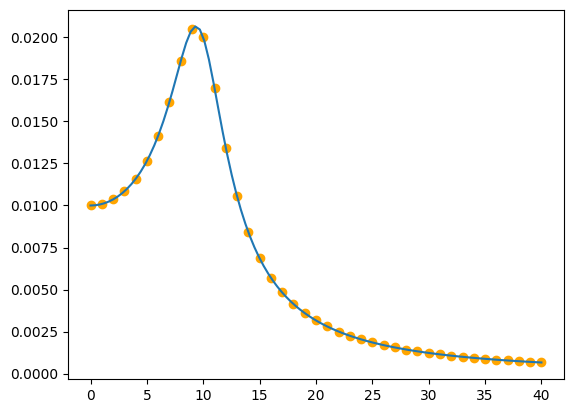

In [ ]:
plt.plot(oos, As, label="Theory")
plt.scatter(omegas, Amps, c="orange", label="Simulation")

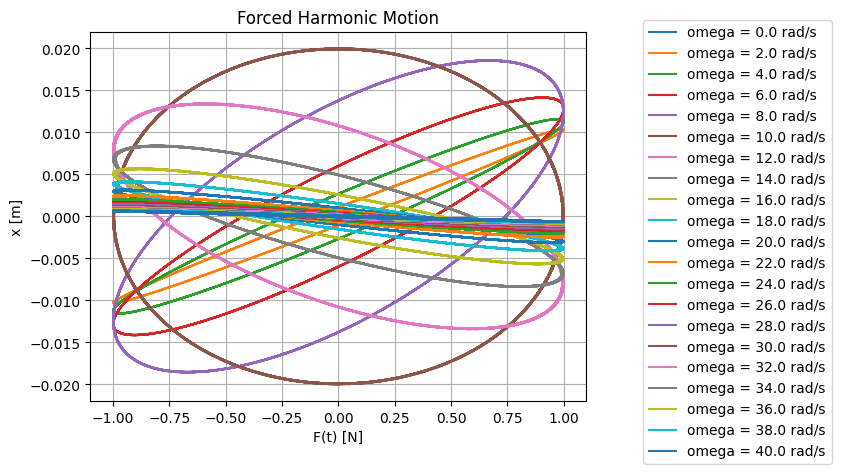

In [ ]:
plt.grid()
plt.title("Forced Harmonic Motion")
plt.xlabel("F(t) [N]")
plt.ylabel("x [m]")

for k in ks[::2]:
  plt.plot(np.cos(omegas[k] * sols[k].t[500:]),
           sols[k].y[0, 500:], label = f"omega = {omegas[k]:.1f} rad/s")

ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05))

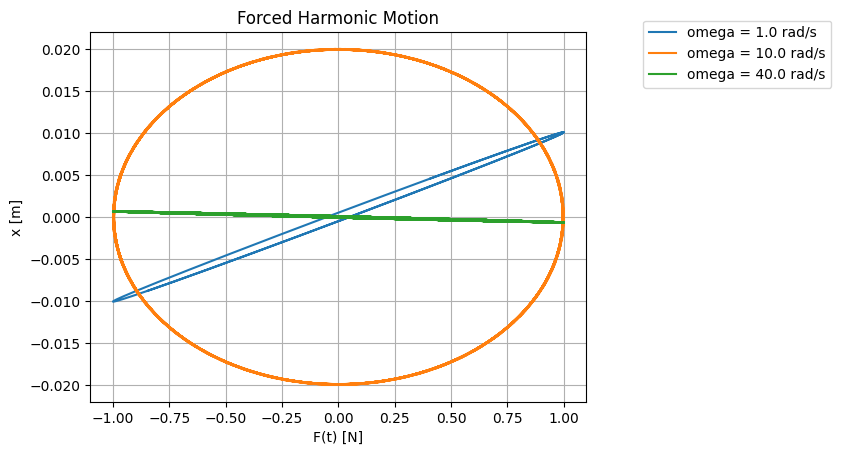

In [ ]:
plt.grid()
plt.title("Forced Harmonic Motion")
plt.xlabel("F(t) [N]")
plt.ylabel("x [m]")

for k in [1, 10, 40]:
  plt.plot(np.cos(omegas[k] * sols[k].t[500:]),
           sols[k].y[0, 500:], label = f"omega = {omegas[k]:.1f} rad/s")
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05))

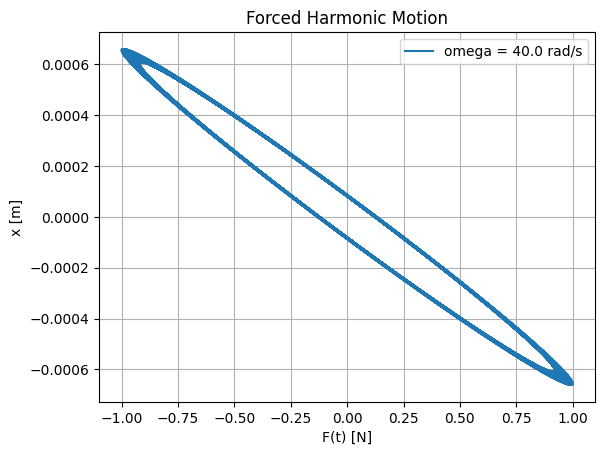

In [ ]:
plt.grid()
plt.title("Forced Harmonic Motion")
plt.xlabel("F(t) [N]")
plt.ylabel("x [m]")

plt.plot(np.cos(omegas[40] * sols[40].t[500:]),
           sols[40].y[0, 500:], label = f"omega = {omegas[k]:.1f} rad/s")
plt.legend()

## 3.8 The Nonlinear Oscillator: Chaotic Motion

In [ ]:
class SimDDHO:
  """
  Driven, Damped Harmonic Oscillator (3.8.7)
  """
  def __init__(self, gamma, alpha, omega):
    self.gamma = gamma
    self.alpha = alpha
    self.omega = omega

    self.x0 = 0.0
    self.y0 = 0.0
    self.z0 = 0.0

    self.tf = 10.0
    self.N = 100

  def set_inits(self, x0, y0, z0):
    self.x0 = x0
    self.y0 = y0
    self.z0 = z0

  def set_time_params(self, tf, N):
    self.tf = tf
    self.N = N

  def dSdt(self, t, S):
    x, y, z = S
    dxdt = y
    dydt = -np.sin(x) - self.gamma * y + self.alpha * np.cos(z)
    dzdt = self.omega
    return (dxdt, dydt, dzdt)

  def run(self):
    S0 = (self.x0, self.y0, self.z0)
    dt = self.tf/self.N
    teval = np.linspace(0, self.tf, self.N+1)
    return solve_ivp(self.dSdt, (0, self.tf), S0, t_eval = teval, max_step = dt)

In [ ]:
alphas = [0.9, 1.07, 1.15, 1.50]
sims2 = [SimDDHO(0.5, a, 2/3) for a in alphas]

for i in range(len(alphas)):
  sims2[i].set_time_params(100*2*np.pi/(2/3),10000)

sols2 = [s.run() for s in sims2]

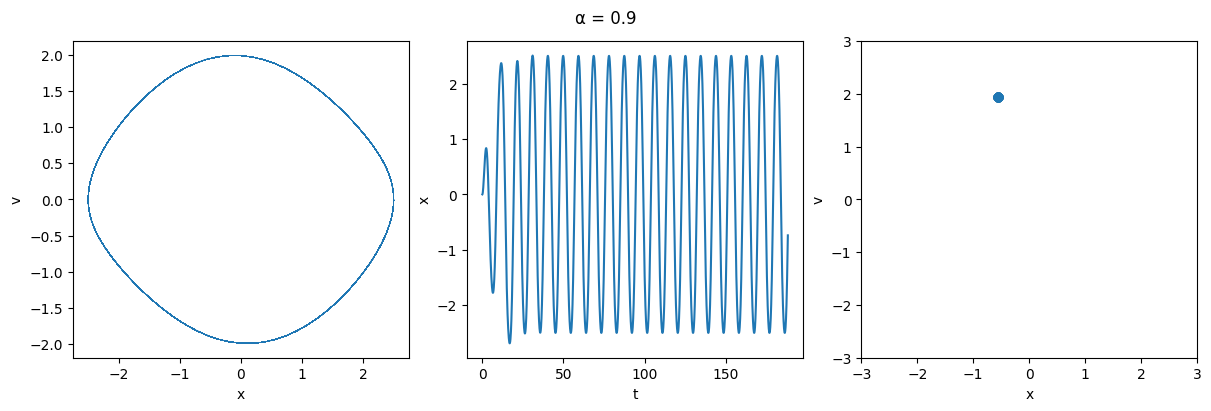

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12, 4), constrained_layout=True)

i=0
plt.suptitle(f"α = {alphas[i]}")
ax[0].set_xlabel("x")
ax[0].set_ylabel("v")
ax[0].plot(sols2[i].y[0, 2000:], sols2[i].y[1, 2000:], label=f"α = {alphas[i]}", lw=0.5)
ax[1].set_xlabel("t")
ax[1].set_ylabel("x")
ax[1].plot(sols2[i].t[:2000], sols2[i].y[0, :2000], label=f"α = {alphas[i]}")
ax[2].set_xlim([-3,3])
ax[2].set_ylim([-3,3])
ax[2].set_xlabel("x")
ax[2].set_ylabel("v")
ax[2].scatter(sols2[i].y[0, 2000::100], sols2[i].y[1, 2000::100], label=f"α = {alphas[i]}")

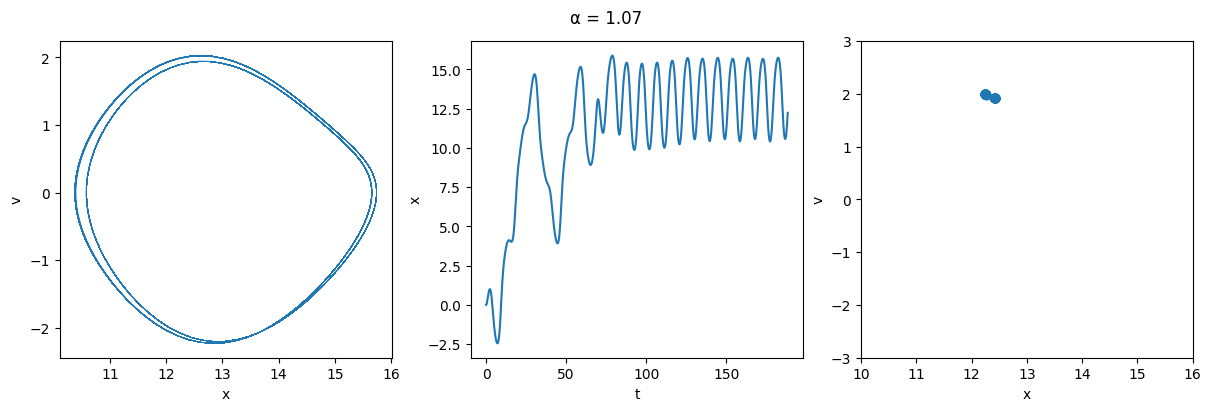

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12, 4), constrained_layout=True)

i=1
plt.suptitle(f"α = {alphas[i]}")
ax[0].set_xlabel("x")
ax[0].set_ylabel("v")
ax[0].plot(sols2[i].y[0, 2000:], sols2[i].y[1, 2000:], label=f"α = {alphas[i]}", lw=0.5)
ax[1].set_xlabel("t")
ax[1].set_ylabel("x")
ax[1].plot(sols2[i].t[:2000], sols2[i].y[0, :2000], label=f"α = {alphas[i]}")
ax[2].set_xlim([10,16])
ax[2].set_ylim([-3,3])
ax[2].set_xlabel("x")
ax[2].set_ylabel("v")
ax[2].scatter(sols2[i].y[0, 2000::100], sols2[i].y[1, 2000::100], label=f"α = {alphas[i]}")

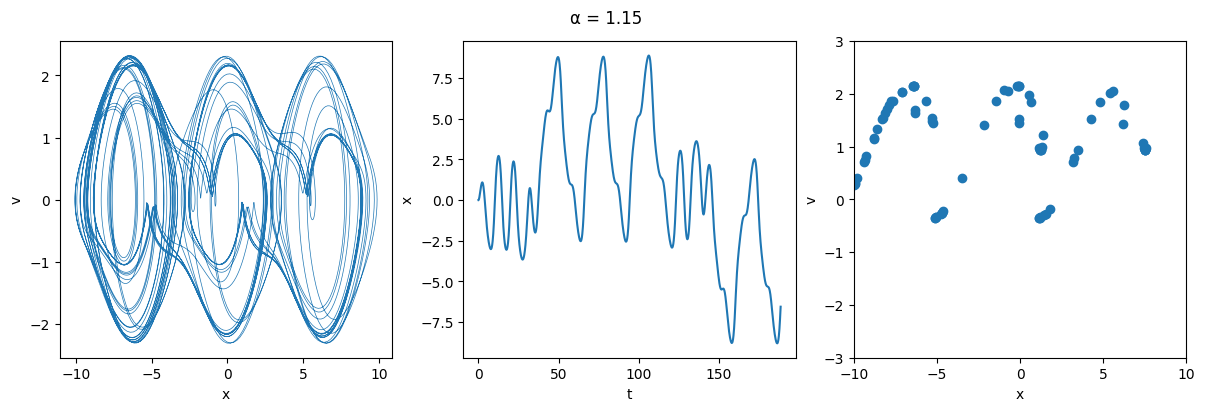

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12, 4), constrained_layout=True)

i=2
plt.suptitle(f"α = {alphas[i]}")
ax[0].set_xlabel("x")
ax[0].set_ylabel("v")
ax[0].plot(sols2[i].y[0, 2000:], sols2[i].y[1, 2000:], label=f"α = {alphas[i]}", lw=0.5)
ax[1].set_xlabel("t")
ax[1].set_ylabel("x")
ax[1].plot(sols2[i].t[:2000], sols2[i].y[0, :2000], label=f"α = {alphas[i]}")
ax[2].set_xlim([-10,10])
ax[2].set_ylim([-3,3])
ax[2].set_xlabel("x")
ax[2].set_ylabel("v")
ax[2].scatter(sols2[i].y[0, 2000::100], sols2[i].y[1, 2000::100], label=f"α = {alphas[i]}")

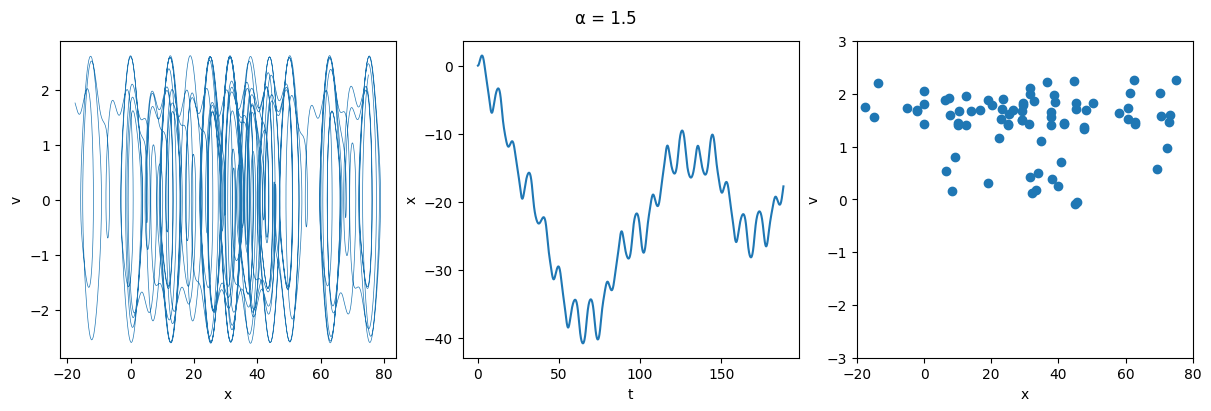

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12, 4), constrained_layout=True)

i=3
plt.suptitle(f"α = {alphas[i]}")
ax[0].set_xlabel("x")
ax[0].set_ylabel("v")
ax[0].plot(sols2[i].y[0, 2000:], sols2[i].y[1, 2000:], label=f"α = {alphas[i]}", lw=0.5)
ax[1].set_xlabel("t")
ax[1].set_ylabel("x")
ax[1].plot(sols2[i].t[:2000], sols2[i].y[0, :2000], label=f"α = {alphas[i]}")
ax[2].set_xlim([-20,80])
ax[2].set_ylim([-3,3])
ax[2].set_xlabel("x")
ax[2].set_ylabel("v")
ax[2].scatter(sols2[i].y[0, 2000::100], sols2[i].y[1, 2000::100], label=f"α = {alphas[i]}")

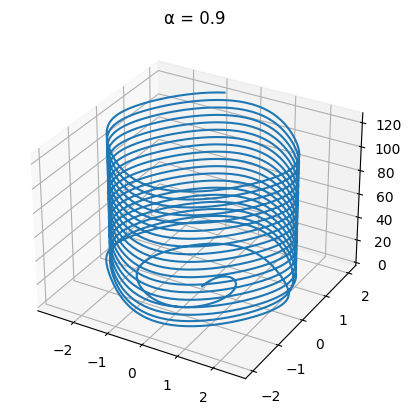

In [ ]:
fig = plt.figure()
i=0
ax = fig.add_subplot(projection="3d")
ax.set_title(f"α = {alphas[i]}")
ax.plot(sols2[i].y[0, :2000],sols2[i].y[1, :2000],sols2[0].y[2, :2000])

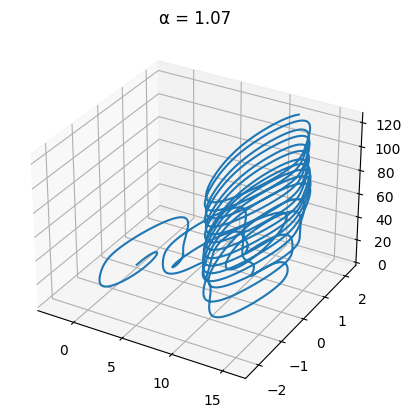

In [ ]:
fig = plt.figure()
i=1
ax = fig.add_subplot(projection="3d")
ax.set_title(f"α = {alphas[i]}")
ax.plot(sols2[i].y[0, :2000],sols2[i].y[1, :2000],sols2[0].y[2, :2000])

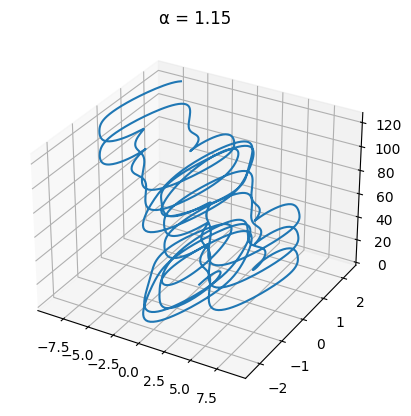

In [ ]:
fig = plt.figure()
i=2
ax = fig.add_subplot(projection="3d")
ax.set_title(f"α = {alphas[i]}")
ax.plot(sols2[i].y[0, :2000],sols2[i].y[1, :2000],sols2[0].y[2, :2000])

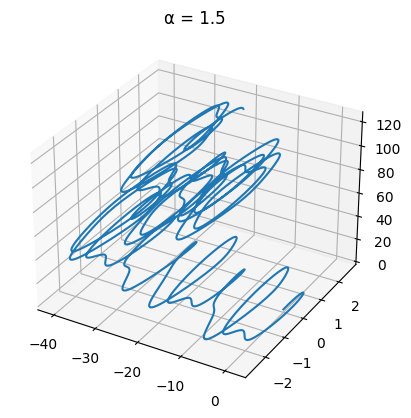

In [ ]:
fig = plt.figure()
i=3
ax = fig.add_subplot(projection="3d")
ax.set_title(f"α = {alphas[i]}")
ax.plot(sols2[i].y[0, :2000],sols2[i].y[1, :2000],sols2[0].y[2, :2000])